In [1]:
from autometrics.dataset.datasets import HelpSteer
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HelpSteer()

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42, max_size=1000)

In [4]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [6]:
from autometrics.metrics.llm_judge.LLMJudgeNormalizeOptimized import LLMJudgeNormalizeOptimized

In [7]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeNormalizeOptimized(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Answer the user query as a helpful chatbot assistant.",
        target_column=target_column,
        output_prompt_path='helpsteer_normalized_' + target_column + '_prompt.dspy',
        metric_name=target_column,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 256.61it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:01, 288.72it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 308.93it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 323.25it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 310.36it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 334.85it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:01, 311.88it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 314.93it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 337.72it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 338.20it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:01, 332.19it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:01, 280.74it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 372.19it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 342.95it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:01, 297.96it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 331.80it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 322.56it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the input text based on the provided task description and metric, and provide a score from 1 to 5 along with a clear and concise reasoning for the assigned score.

2: You are an expert in evaluating the helpfulness of chatbot responses. Given an input text, the task description that the chatbot was trying to follow, and a metric to rate the text on (helpfulness), return a score from 1-5 on this metric, along with a clear and concise explanation of your reasoning for the sco

Average Metric: 199.01666666666685 / 300  (66.3): 100%|██████████| 300/300 [00:00<00:00, 663.17it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 66.34

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 424.08it/s]              


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [66.0]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 2 / 25 ==


Average Metric: 13.416666666666666 / 25  (53.7): 100%|██████████| 25/25 [00:00<00:00, 422.16it/s]


Score: 53.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [66.0, 53.67]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 3 / 25 ==


Average Metric: 16.200000000000003 / 25  (64.8): 100%|██████████| 25/25 [00:00<00:00, 473.62it/s]


Score: 64.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [66.0, 53.67, 64.8]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 4 / 25 ==


Average Metric: 17.583333333333336 / 25  (70.3): 100%|██████████| 25/25 [00:00<00:00, 443.64it/s]


Score: 70.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 5 / 25 ==


Average Metric: 13.916666666666668 / 25  (55.7): 100%|██████████| 25/25 [00:00<00:00, 533.85it/s]


Score: 55.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 6 / 25 ==


Average Metric: 12.916666666666664 / 25  (51.7): 100%|██████████| 25/25 [00:00<00:00, 481.83it/s]


Score: 51.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 7 / 25 ==


Average Metric: 15.2 / 25  (60.8): 100%|██████████| 25/25 [00:00<00:00, 3758.34it/s]            


Score: 60.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 8 / 25 ==


Average Metric: 15.366666666666667 / 25  (61.5): 100%|██████████| 25/25 [00:00<00:00, 760.50it/s]


Score: 61.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 9 / 25 ==


Average Metric: 15.000000000000002 / 25  (60.0): 100%|██████████| 25/25 [00:00<00:00, 505.34it/s]


Score: 60.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0]
Full eval scores so far: [66.34]
Best full score so far: 66.34


== Minibatch Trial 10 / 25 ==


Average Metric: 17.400000000000002 / 25  (69.6): 100%|██████████| 25/25 [00:00<00:00, 405.86it/s]


Score: 69.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6]
Full eval scores so far: [66.34]
Best full score so far: 66.34


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 70.33) from minibatch trials...


Average Metric: 181.91666666666677 / 300  (60.6): 100%|██████████| 300/300 [00:00<00:00, 572.77it/s]


Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 11 / 25 ==


Average Metric: 17.249999999999996 / 25  (69.0): 100%|██████████| 25/25 [00:00<00:00, 330.74it/s]


Score: 69.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 12 / 25 ==


Average Metric: 16.0 / 25  (64.0): 100%|██████████| 25/25 [00:00<00:00, 574.53it/s]              


Score: 64.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 13 / 25 ==


Average Metric: 14.866666666666667 / 25  (59.5): 100%|██████████| 25/25 [00:00<00:00, 2659.00it/s]


Score: 59.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 14 / 25 ==


Average Metric: 17.499999999999996 / 25  (70.0): 100%|██████████| 25/25 [00:00<00:00, 1151.91it/s]


Score: 70.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 15 / 25 ==


Average Metric: 15.666666666666666 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 803.94it/s]


Score: 62.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 16 / 25 ==


Average Metric: 17.333333333333336 / 25  (69.3): 100%|██████████| 25/25 [00:00<00:00, 1069.29it/s]


Score: 69.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 17 / 25 ==


Average Metric: 16.333333333333332 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 1114.68it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 18 / 25 ==


Average Metric: 16.833333333333336 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 412.04it/s]


Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 19 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 432.62it/s]              


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33, 66.0]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


== Minibatch Trial 20 / 25 ==


Average Metric: 15.650000000000002 / 25  (62.6): 100%|██████████| 25/25 [00:00<00:00, 404.41it/s]


Score: 62.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33, 66.0, 62.6]
Full eval scores so far: [66.34, 60.64]
Best full score so far: 66.34


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 69.66499999999999) from minibatch trials...


Average Metric: 204.48333333333346 / 300  (68.2): 100%|██████████| 300/300 [00:00<00:00, 942.43it/s]


New best full eval score! Score: 68.16
Full eval scores so far: [66.34, 60.64, 68.16]
Best full score so far: 68.16


== Minibatch Trial 21 / 25 ==


Average Metric: 15.916666666666666 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 429.53it/s]


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33, 66.0, 62.6, 63.67]
Full eval scores so far: [66.34, 60.64, 68.16]
Best full score so far: 68.16


== Minibatch Trial 22 / 25 ==


Average Metric: 15.833333333333336 / 25  (63.3): 100%|██████████| 25/25 [00:00<00:00, 450.24it/s]


Score: 63.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33, 66.0, 62.6, 63.67, 63.33]
Full eval scores so far: [66.34, 60.64, 68.16]
Best full score so far: 68.16


== Minibatch Trial 23 / 25 ==


Average Metric: 13.333333333333334 / 25  (53.3): 100%|██████████| 25/25 [00:00<00:00, 428.51it/s]


Score: 53.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33, 66.0, 62.6, 63.67, 63.33, 53.33]
Full eval scores so far: [66.34, 60.64, 68.16]
Best full score so far: 68.16


== Minibatch Trial 24 / 25 ==


Average Metric: 15.583333333333334 / 25  (62.3): 100%|██████████| 25/25 [00:00<00:00, 564.73it/s]


Score: 62.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33, 66.0, 62.6, 63.67, 63.33, 53.33, 62.33]
Full eval scores so far: [66.34, 60.64, 68.16]
Best full score so far: 68.16


== Minibatch Trial 25 / 25 ==


Average Metric: 17.366666666666667 / 25  (69.5): 100%|██████████| 25/25 [00:00<00:00, 461.69it/s]


Score: 69.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 11'].
Minibatch scores so far: [66.0, 53.67, 64.8, 70.33, 55.67, 51.67, 60.8, 61.47, 60.0, 69.6, 69.0, 64.0, 59.47, 70.0, 62.67, 69.33, 65.33, 67.33, 66.0, 62.6, 63.67, 63.33, 53.33, 62.33, 69.47]
Full eval scores so far: [66.34, 60.64, 68.16]
Best full score so far: 68.16


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 69.47) from minibatch trials...


Average Metric: 194.68333333333348 / 300  (64.9): 100%|██████████| 300/300 [00:00<00:00, 606.38it/s]


Full eval scores so far: [66.34, 60.64, 68.16, 64.89]
Best full score so far: 68.16


Returning best identified program with score 68.16!


Grading rows: 100%|██████████| 1789/1789 [00:03<00:00, 568.70row/s]



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 321.92it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:01, 254.87it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 263.57it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 279.07it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 290.70it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 304.65it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:01, 261.74it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 296.32it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:02, 246.94it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 287.37it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:04, 99.46it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:02, 221.15it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 350.76it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 285.83it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:01, 261.37it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 328.71it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 272.70it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the given text based on the provided task description and metric, and assign a score from 1 to 5 that reflects how well the text meets the specified criteria, providing a clear and concise reasoning for the assigned score.

2: You are a critical thinking expert who evaluates the performance of a language model in responding to user queries. Given an input text, the task description that the model was trying to follow, and a metric to rate the text on (such as correctness, r

Average Metric: 195.2666666666667 / 300  (65.1): 100%|██████████| 300/300 [00:00<00:00, 1099.47it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 65.09

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 16.166666666666664 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 638.26it/s]


Score: 64.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [64.67]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 2 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 809.72it/s]              


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [64.67, 66.0]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 3 / 25 ==


Average Metric: 16.200000000000003 / 25  (64.8): 100%|██████████| 25/25 [00:00<00:00, 848.41it/s]


Score: 64.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.67, 66.0, 64.8]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 4 / 25 ==


Average Metric: 16.916666666666668 / 25  (67.7): 100%|██████████| 25/25 [00:00<00:00, 834.89it/s]


Score: 67.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 5 / 25 ==


Average Metric: 14.500000000000004 / 25  (58.0): 100%|██████████| 25/25 [00:00<00:00, 850.41it/s]


Score: 58.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 6 / 25 ==


Average Metric: 12.75 / 25  (51.0): 100%|██████████| 25/25 [00:00<00:00, 614.41it/s]             


Score: 51.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 7 / 25 ==


Average Metric: 13.866666666666667 / 25  (55.5): 100%|██████████| 25/25 [00:00<00:00, 537.20it/s]


Score: 55.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 8 / 25 ==


Average Metric: 17.116666666666667 / 25  (68.5): 100%|██████████| 25/25 [00:00<00:00, 824.90it/s]


Score: 68.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 9 / 25 ==


Average Metric: 15.916666666666668 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 263.50it/s]


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67]
Full eval scores so far: [65.09]
Best full score so far: 65.09


== Minibatch Trial 10 / 25 ==


Average Metric: 15.65 / 25  (62.6): 100%|██████████| 25/25 [00:00<00:00, 708.72it/s]             


Score: 62.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6]
Full eval scores so far: [65.09]
Best full score so far: 65.09


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 68.47) from minibatch trials...


Average Metric: 195.93333333333345 / 300  (65.3): 100%|██████████| 300/300 [00:00<00:00, 539.15it/s]


New best full eval score! Score: 65.31
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 11 / 25 ==


Average Metric: 17.083333333333336 / 25  (68.3): 100%|██████████| 25/25 [00:00<00:00, 469.01it/s]


Score: 68.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 12 / 25 ==


Average Metric: 16.666666666666668 / 25  (66.7): 100%|██████████| 25/25 [00:00<00:00, 1060.94it/s]


Score: 66.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 13 / 25 ==


Average Metric: 13.2 / 25  (52.8): 100%|██████████| 25/25 [00:00<00:00, 577.21it/s]              


Score: 52.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 14 / 25 ==


Average Metric: 15.333333333333332 / 25  (61.3): 100%|██████████| 25/25 [00:00<00:00, 409.41it/s]


Score: 61.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 15 / 25 ==


Average Metric: 16.166666666666668 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 4755.66it/s]


Score: 64.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 16 / 25 ==


Average Metric: 15.416666666666666 / 25  (61.7): 100%|██████████| 25/25 [00:00<00:00, 624.33it/s]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 17 / 25 ==


Average Metric: 15.166666666666666 / 25  (60.7): 100%|██████████| 25/25 [00:00<00:00, 875.37it/s]


Score: 60.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 18 / 25 ==


Average Metric: 16.416666666666664 / 25  (65.7): 100%|██████████| 25/25 [00:00<00:00, 558.90it/s]


Score: 65.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 19 / 25 ==


Average Metric: 18.166666666666668 / 25  (72.7): 100%|██████████| 25/25 [00:00<00:00, 596.52it/s]


Score: 72.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67, 72.67]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


== Minibatch Trial 20 / 25 ==


Average Metric: 17.25 / 25  (69.0): 100%|██████████| 25/25 [00:00<00:00, 1186.09it/s]             


Score: 69.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67, 72.67, 69.0]
Full eval scores so far: [65.09, 65.31]
Best full score so far: 65.31


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 72.67) from minibatch trials...


Average Metric: 199.4000000000001 / 300  (66.5): 100%|██████████| 300/300 [00:00<00:00, 881.24it/s]


New best full eval score! Score: 66.47
Full eval scores so far: [65.09, 65.31, 66.47]
Best full score so far: 66.47


== Minibatch Trial 21 / 25 ==


Average Metric: 16.666666666666668 / 25  (66.7): 100%|██████████| 25/25 [00:00<00:00, 704.74it/s]


Score: 66.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67, 72.67, 69.0, 66.67]
Full eval scores so far: [65.09, 65.31, 66.47]
Best full score so far: 66.47


== Minibatch Trial 22 / 25 ==


Average Metric: 15.333333333333334 / 25  (61.3): 100%|██████████| 25/25 [00:00<00:00, 667.48it/s]


Score: 61.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67, 72.67, 69.0, 66.67, 61.33]
Full eval scores so far: [65.09, 65.31, 66.47]
Best full score so far: 66.47


== Minibatch Trial 23 / 25 ==


Average Metric: 14.2 / 25  (56.8): 100%|██████████| 25/25 [00:00<00:00, 567.51it/s]              


Score: 56.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67, 72.67, 69.0, 66.67, 61.33, 56.8]
Full eval scores so far: [65.09, 65.31, 66.47]
Best full score so far: 66.47


== Minibatch Trial 24 / 25 ==


Average Metric: 18.416666666666664 / 25  (73.7): 100%|██████████| 25/25 [00:00<00:00, 604.17it/s]


Score: 73.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67, 72.67, 69.0, 66.67, 61.33, 56.8, 73.67]
Full eval scores so far: [65.09, 65.31, 66.47]
Best full score so far: 66.47


== Minibatch Trial 25 / 25 ==


Average Metric: 17.166666666666668 / 25  (68.7): 100%|██████████| 25/25 [00:00<00:00, 560.84it/s]


Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [64.67, 66.0, 64.8, 67.67, 58.0, 51.0, 55.47, 68.47, 63.67, 62.6, 68.33, 66.67, 52.8, 61.33, 64.67, 61.67, 60.67, 65.67, 72.67, 69.0, 66.67, 61.33, 56.8, 73.67, 68.67]
Full eval scores so far: [65.09, 65.31, 66.47]
Best full score so far: 66.47


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 71.33500000000001) from minibatch trials...


Average Metric: 199.9833333333334 / 300  (66.7): 100%|██████████| 300/300 [00:00<00:00, 899.15it/s] 


New best full eval score! Score: 66.66
Full eval scores so far: [65.09, 65.31, 66.47, 66.66]
Best full score so far: 66.66


Returning best identified program with score 66.66!


Grading rows:  22%|██▏       | 386/1789 [00:00<00:02, 616.99row/s] 

Error processing row 335: Expected dict_keys(['reasoning', 'score']) but got dict_keys(['reasoning'])


Grading rows: 100%|██████████| 1789/1789 [00:03<00:00, 532.78row/s]



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 321.40it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:01, 299.45it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 274.05it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 262.99it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 288.93it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 325.72it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:01, 277.46it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 311.40it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 315.99it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 329.14it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:01, 329.02it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:01, 270.73it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 359.78it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 328.68it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:01, 293.67it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 312.70it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 257.64it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the input text based on the provided task description and metric, and return a score from 1 to 5, along with a clear and concise reasoning for the assigned score.

2: You are a conversational AI expert who specializes in evaluating the coherence of chatbot responses. Given an input text, the task description that the model was trying to follow, and a metric to rate the text on (in this case, coherence), return a score from 1-5 on this metric, along with a clear and concise 

Average Metric: 215.35 / 300  (71.8): 100%|██████████| 300/300 [00:00<00:00, 713.12it/s]           
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 71.78

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 17.416666666666668 / 25  (69.7): 100%|██████████| 25/25 [00:00<00:00, 618.79it/s]


Score: 69.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [69.67]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 2 / 25 ==


Average Metric: 16.833333333333332 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 779.64it/s]


Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [69.67, 67.33]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 3 / 25 ==


Average Metric: 14.366666666666665 / 25  (57.5): 100%|██████████| 25/25 [00:00<00:00, 555.84it/s]


Score: 57.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [69.67, 67.33, 57.47]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 4 / 25 ==


Average Metric: 15.483333333333334 / 25  (61.9): 100%|██████████| 25/25 [00:00<00:00, 714.53it/s]


Score: 61.93 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 5 / 25 ==


Average Metric: 15.200000000000003 / 25  (60.8): 100%|██████████| 25/25 [00:00<00:00, 756.20it/s]

Score: 60.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].


Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 6 / 25 ==


Average Metric: 14.033333333333333 / 25  (56.1): 100%|██████████| 25/25 [00:00<00:00, 421.91it/s]


Score: 56.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 7 / 25 ==


Average Metric: 16.25 / 25  (65.0): 100%|██████████| 25/25 [00:00<00:00, 476.20it/s]            


Score: 65.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 8 / 25 ==


Average Metric: 17.75 / 25  (71.0): 100%|██████████| 25/25 [00:00<00:00, 512.18it/s]             


Score: 71.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 9 / 25 ==


Average Metric: 18.7 / 25  (74.8): 100%|██████████| 25/25 [00:00<00:00, 566.91it/s]              


Score: 74.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8]
Full eval scores so far: [71.78]
Best full score so far: 71.78


== Minibatch Trial 10 / 25 ==


Average Metric: 16.116666666666667 / 25  (64.5): 100%|██████████| 25/25 [00:00<00:00, 520.24it/s]


Score: 64.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47]
Full eval scores so far: [71.78]
Best full score so far: 71.78


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 74.8) from minibatch trials...


Average Metric: 212.4166666666667 / 300  (70.8): 100%|██████████| 300/300 [00:00<00:00, 497.68it/s]


Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 11 / 25 ==


Average Metric: 19.366666666666664 / 25  (77.5): 100%|██████████| 25/25 [00:00<00:00, 539.73it/s]


Score: 77.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 12 / 25 ==


Average Metric: 19.25 / 25  (77.0): 100%|██████████| 25/25 [00:00<00:00, 5310.32it/s]


Score: 77.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 13 / 25 ==


Average Metric: 16.78333333333333 / 25  (67.1): 100%|██████████| 25/25 [00:00<00:00, 551.18it/s] 


Score: 67.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 14 / 25 ==


Average Metric: 18.083333333333332 / 25  (72.3): 100%|██████████| 25/25 [00:00<00:00, 604.47it/s]


Score: 72.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 15 / 25 ==


Average Metric: 19.53333333333333 / 25  (78.1): 100%|██████████| 25/25 [00:00<00:00, 543.13it/s] 


Score: 78.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 16 / 25 ==


Average Metric: 15.916666666666668 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 506.44it/s]


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 17 / 25 ==


Average Metric: 14.283333333333333 / 25  (57.1): 100%|██████████| 25/25 [00:00<00:00, 501.04it/s]


Score: 57.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 8'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 18 / 25 ==


Average Metric: 18.416666666666664 / 25  (73.7): 100%|██████████| 25/25 [00:00<00:00, 465.63it/s]


Score: 73.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 19 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 326.70it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67, 65.33]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


== Minibatch Trial 20 / 25 ==


Average Metric: 17.666666666666668 / 25  (70.7): 100%|██████████| 25/25 [00:00<00:00, 470.30it/s]


Score: 70.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67, 65.33, 70.67]
Full eval scores so far: [71.78, 70.81]
Best full score so far: 71.78


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 78.13) from minibatch trials...


Average Metric: 210.58333333333337 / 300  (70.2): 100%|██████████| 300/300 [00:00<00:00, 666.39it/s]


Full eval scores so far: [71.78, 70.81, 70.19]
Best full score so far: 71.78


== Minibatch Trial 21 / 25 ==


Average Metric: 17.833333333333332 / 25  (71.3): 100%|██████████| 25/25 [00:00<00:00, 5446.87it/s]


Score: 71.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67, 65.33, 70.67, 71.33]
Full eval scores so far: [71.78, 70.81, 70.19]
Best full score so far: 71.78


== Minibatch Trial 22 / 25 ==


Average Metric: 14.866666666666665 / 25  (59.5): 100%|██████████| 25/25 [00:00<00:00, 745.64it/s]


Score: 59.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67, 65.33, 70.67, 71.33, 59.47]
Full eval scores so far: [71.78, 70.81, 70.19]
Best full score so far: 71.78


== Minibatch Trial 23 / 25 ==


Average Metric: 18.416666666666668 / 25  (73.7): 100%|██████████| 25/25 [00:00<00:00, 534.92it/s]

Score: 73.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 9'].


Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67, 65.33, 70.67, 71.33, 59.47, 73.67]
Full eval scores so far: [71.78, 70.81, 70.19]
Best full score so far: 71.78


== Minibatch Trial 24 / 25 ==


Average Metric: 19.333333333333332 / 25  (77.3): 100%|██████████| 25/25 [00:00<00:00, 509.01it/s]


Score: 77.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67, 65.33, 70.67, 71.33, 59.47, 73.67, 77.33]
Full eval scores so far: [71.78, 70.81, 70.19]
Best full score so far: 71.78


== Minibatch Trial 25 / 25 ==


Average Metric: 15.416666666666668 / 25  (61.7): 100%|██████████| 25/25 [00:00<00:00, 673.51it/s]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [69.67, 67.33, 57.47, 61.93, 60.8, 56.13, 65.0, 71.0, 74.8, 64.47, 77.47, 77.0, 67.13, 72.33, 78.13, 63.67, 57.13, 73.67, 65.33, 70.67, 71.33, 59.47, 73.67, 77.33, 61.67]
Full eval scores so far: [71.78, 70.81, 70.19]
Best full score so far: 71.78


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 77.33) from minibatch trials...


Average Metric: 212.18333333333334 / 300  (70.7): 100%|██████████| 300/300 [00:00<00:00, 577.03it/s]


Full eval scores so far: [71.78, 70.81, 70.19, 70.73]
Best full score so far: 71.78


Returning best identified program with score 71.78!


Grading rows: 100%|██████████| 1789/1789 [00:03<00:00, 549.00row/s] 



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 324.15it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:01, 293.54it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 289.39it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 313.64it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 285.01it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 321.34it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:02, 229.41it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 306.23it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 319.63it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 324.38it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:01, 289.07it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:01, 260.84it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 354.03it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 337.59it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:01, 284.35it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 303.87it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 300.86it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the input text based on the provided task description and metric, and return a score from 1 to 5 along with a clear and concise reasoning for the score.

2: You are a seasoned language model evaluator. Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, carefully analyze the text and provide a score from 1-5 on this metric, along with a clear and concise reasoning for the score. Consider the complexity, coherence,

Average Metric: 175.26666666666677 / 300  (58.4): 100%|██████████| 300/300 [00:00<00:00, 834.95it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 58.42

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 16.25 / 25  (65.0): 100%|██████████| 25/25 [00:00<00:00, 559.71it/s]             


Score: 65.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [65.0]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 2 / 25 ==


Average Metric: 14.166666666666668 / 25  (56.7): 100%|██████████| 25/25 [00:00<00:00, 609.38it/s]


Score: 56.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [65.0, 56.67]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 3 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 393.32it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [65.0, 56.67, 65.33]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 4 / 25 ==


Average Metric: 15.666666666666666 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 461.73it/s]


Score: 62.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 5 / 25 ==


Average Metric: 10.483333333333334 / 25  (41.9): 100%|██████████| 25/25 [00:00<00:00, 569.00it/s]


Score: 41.93 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 6 / 25 ==


Average Metric: 13.333333333333336 / 25  (53.3): 100%|██████████| 25/25 [00:00<00:00, 418.87it/s]


Score: 53.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 7 / 25 ==


Average Metric: 15.666666666666668 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 623.60it/s]


Score: 62.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 8 / 25 ==


Average Metric: 18.833333333333332 / 25  (75.3): 100%|██████████| 25/25 [00:00<00:00, 771.49it/s] 


Score: 75.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 9 / 25 ==


Average Metric: 15.833333333333336 / 25  (63.3): 100%|██████████| 25/25 [00:00<00:00, 268.01it/s]


Score: 63.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33]
Full eval scores so far: [58.42]
Best full score so far: 58.42


== Minibatch Trial 10 / 25 ==


Average Metric: 14.583333333333334 / 25  (58.3): 100%|██████████| 25/25 [00:00<00:00, 623.77it/s]


Score: 58.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33]
Full eval scores so far: [58.42]
Best full score so far: 58.42


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 75.33) from minibatch trials...


Average Metric: 188.51666666666677 / 300  (62.8): 100%|██████████| 300/300 [00:00<00:00, 432.23it/s]


New best full eval score! Score: 62.84
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 11 / 25 ==


Average Metric: 14.200000000000001 / 25  (56.8): 100%|██████████| 25/25 [00:00<00:00, 609.37it/s]


Score: 56.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 12 / 25 ==


Average Metric: 13.5 / 25  (54.0): 100%|██████████| 25/25 [00:00<00:00, 415.63it/s]              


Score: 54.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 13 / 25 ==


Average Metric: 15.783333333333331 / 25  (63.1): 100%|██████████| 25/25 [00:00<00:00, 476.39it/s]


Score: 63.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 14 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 5496.83it/s]              


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 15 / 25 ==


Average Metric: 13.616666666666669 / 25  (54.5): 100%|██████████| 25/25 [00:00<00:00, 5242.88it/s]


Score: 54.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 16 / 25 ==


Average Metric: 17.366666666666667 / 25  (69.5): 100%|██████████| 25/25 [00:00<00:00, 577.35it/s]


Score: 69.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 17 / 25 ==


Average Metric: 17.0 / 25  (68.0): 100%|██████████| 25/25 [00:00<00:00, 513.93it/s]              


Score: 68.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 18 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 542.56it/s]              


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 19 / 25 ==


Average Metric: 15.533333333333335 / 25  (62.1): 100%|██████████| 25/25 [00:00<00:00, 5322.45it/s]


Score: 62.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0, 62.13]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


== Minibatch Trial 20 / 25 ==


Average Metric: 14.833333333333334 / 25  (59.3): 100%|██████████| 25/25 [00:00<00:00, 677.88it/s]


Score: 59.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0, 62.13, 59.33]
Full eval scores so far: [58.42, 62.84]
Best full score so far: 62.84


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 68.735) from minibatch trials...


Average Metric: 187.90000000000012 / 300  (62.6): 100%|██████████| 300/300 [00:00<00:00, 2964.54it/s]


Full eval scores so far: [58.42, 62.84, 62.63]
Best full score so far: 62.84


== Minibatch Trial 21 / 25 ==


Average Metric: 15.000000000000002 / 25  (60.0): 100%|██████████| 25/25 [00:37<00:00,  1.51s/it]


Score: 60.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0, 62.13, 59.33, 60.0]
Full eval scores so far: [58.42, 62.84, 62.63]
Best full score so far: 62.84


== Minibatch Trial 22 / 25 ==


Average Metric: 15.75 / 25  (63.0): 100%|██████████| 25/25 [00:41<00:00,  1.64s/it]             


Score: 63.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0, 62.13, 59.33, 60.0, 63.0]
Full eval scores so far: [58.42, 62.84, 62.63]
Best full score so far: 62.84


== Minibatch Trial 23 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0, 62.13, 59.33, 60.0, 63.0, 65.33]
Full eval scores so far: [58.42, 62.84, 62.63]
Best full score so far: 62.84


== Minibatch Trial 24 / 25 ==


Average Metric: 14.333333333333334 / 25  (57.3): 100%|██████████| 25/25 [00:28<00:00,  1.13s/it]


Score: 57.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 8'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0, 62.13, 59.33, 60.0, 63.0, 65.33, 57.33]
Full eval scores so far: [58.42, 62.84, 62.63]
Best full score so far: 62.84


== Minibatch Trial 25 / 25 ==


Average Metric: 15.583333333333332 / 25  (62.3): 100%|██████████| 25/25 [00:00<00:00, 4035.47it/s]


Score: 62.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [65.0, 56.67, 65.33, 62.67, 41.93, 53.33, 62.67, 75.33, 63.33, 58.33, 56.8, 54.0, 63.13, 66.0, 54.47, 69.47, 68.0, 66.0, 62.13, 59.33, 60.0, 63.0, 65.33, 57.33, 62.33]
Full eval scores so far: [58.42, 62.84, 62.63]
Best full score so far: 62.84


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 66.0) from minibatch trials...


Average Metric: 186.56666666666675 / 300  (62.2): 100%|██████████| 300/300 [02:20<00:00,  2.13it/s]


Full eval scores so far: [58.42, 62.84, 62.63, 62.19]
Best full score so far: 62.84


Returning best identified program with score 62.84!


Grading rows: 100%|██████████| 1789/1789 [11:46<00:00,  2.53row/s]



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:29<30:34,  3.73s/it]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:42<58:45,  7.14s/it]  


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:23<1:37:21, 11.73s/it]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [01:18<1:20:06,  9.77s/it]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:26<54:03,  6.54s/it]  


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:14<1:00:18,  7.27s/it]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:15<1:04:36,  7.78s/it]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:45<1:14:31,  9.03s/it]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [01:07<1:32:42, 11.26s/it]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:56<1:33:04, 11.28s/it]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:48<1:06:32,  8.08s/it]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [01:15<2:35:12, 18.78s/it]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [01:34<1:36:33, 11.77s/it]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [01:51<1:54:25, 13.95s/it]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [01:13<2:01:17, 14.70s/it]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:16<2:17:04, 16.48s/it]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [01:02<1:42:48, 12.46s/it]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the given text based on the provided task description and metric, and provide a score from 1 to 5 along with a clear and concise reasoning for the score.

2: You are a helpful AI assistant who answers user queries about a reference text. Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric, providing a clear and concise reasoning for your score.

3: Given a text, a task descri

Average Metric: 177.6833333333334 / 300  (59.2): 100%|██████████| 300/300 [01:09<00:00,  4.29it/s] 
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 59.23

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 17.0 / 25  (68.0): 100%|██████████| 25/25 [00:10<00:00,  2.34it/s]              


Score: 68.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [68.0]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 2 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:11<00:00,  2.21it/s]


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [68.0, 67.0]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 3 / 25 ==


Average Metric: 15.2 / 25  (60.8): 100%|██████████| 25/25 [00:10<00:00,  2.28it/s]              


Score: 60.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [68.0, 67.0, 60.8]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 4 / 25 ==


Average Metric: 20.083333333333336 / 25  (80.3): 100%|██████████| 25/25 [00:11<00:00,  2.15it/s]


Score: 80.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 5 / 25 ==


Average Metric: 15.916666666666668 / 25  (63.7): 100%|██████████| 25/25 [00:11<00:00,  2.20it/s]


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 6 / 25 ==


Average Metric: 15.416666666666666 / 25  (61.7): 100%|██████████| 25/25 [00:11<00:00,  2.22it/s]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 7 / 25 ==


Average Metric: 16.25 / 25  (65.0): 100%|██████████| 25/25 [00:10<00:00,  2.36it/s]             


Score: 65.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 8 / 25 ==


Average Metric: 15.416666666666666 / 25  (61.7): 100%|██████████| 25/25 [00:16<00:00,  1.56it/s]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 9 / 25 ==


Average Metric: 15.0 / 25  (60.0): 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]             


Score: 60.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0]
Full eval scores so far: [59.23]
Best full score so far: 59.23


== Minibatch Trial 10 / 25 ==


Average Metric: 12.25 / 25  (49.0): 100%|██████████| 25/25 [00:25<00:00,  1.01s/it]             


Score: 49.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0]
Full eval scores so far: [59.23]
Best full score so far: 59.23


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 80.33) from minibatch trials...


Average Metric: 204.7000000000001 / 300  (68.2): 100%|██████████| 300/300 [01:40<00:00,  2.97it/s] 


New best full eval score! Score: 68.23
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 11 / 25 ==


Average Metric: 15.416666666666666 / 25  (61.7): 100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 12 / 25 ==


Average Metric: 17.666666666666668 / 25  (70.7): 100%|██████████| 25/25 [00:00<00:00, 4063.15it/s]


Score: 70.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 13 / 25 ==


Average Metric: 14.95 / 25  (59.8): 100%|██████████| 25/25 [00:00<00:00, 5123.75it/s]             


Score: 59.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 14 / 25 ==


Average Metric: 14.950000000000001 / 25  (59.8): 100%|██████████| 25/25 [00:22<00:00,  1.09it/s]


Score: 59.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 15 / 25 ==


Average Metric: 17.083333333333332 / 25  (68.3): 100%|██████████| 25/25 [00:47<00:00,  1.90s/it]


Score: 68.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 16 / 25 ==


Average Metric: 17.249999999999996 / 25  (69.0): 100%|██████████| 25/25 [00:25<00:00,  1.02s/it]


Score: 69.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 17 / 25 ==


Average Metric: 18.5 / 25  (74.0): 100%|██████████| 25/25 [00:32<00:00,  1.29s/it]              


Score: 74.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 18 / 25 ==


Average Metric: 15.75 / 25  (63.0): 100%|██████████| 25/25 [00:32<00:00,  1.31s/it]             


Score: 63.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 19 / 25 ==


Average Metric: 16.916666666666664 / 25  (67.7): 100%|██████████| 25/25 [00:23<00:00,  1.04it/s]


Score: 67.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0, 67.67]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


== Minibatch Trial 20 / 25 ==


Average Metric: 17.583333333333332 / 25  (70.3): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


Score: 70.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0, 67.67, 70.33]
Full eval scores so far: [59.23, 68.23]
Best full score so far: 68.23


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 74.0) from minibatch trials...


Average Metric: 204.3166666666668 / 300  (68.1): 100%|██████████| 300/300 [01:58<00:00,  2.53it/s] 


Full eval scores so far: [59.23, 68.23, 68.11]
Best full score so far: 68.23


== Minibatch Trial 21 / 25 ==


Average Metric: 15.533333333333333 / 25  (62.1): 100%|██████████| 25/25 [00:00<00:00, 5024.08it/s]


Score: 62.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0, 67.67, 70.33, 62.13]
Full eval scores so far: [59.23, 68.23, 68.11]
Best full score so far: 68.23


== Minibatch Trial 22 / 25 ==


Average Metric: 19.166666666666668 / 25  (76.7): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


Score: 76.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0, 67.67, 70.33, 62.13, 76.67]
Full eval scores so far: [59.23, 68.23, 68.11]
Best full score so far: 68.23


== Minibatch Trial 23 / 25 ==


Average Metric: 17.0 / 25  (68.0): 100%|██████████| 25/25 [00:25<00:00,  1.01s/it]             


Score: 68.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0, 67.67, 70.33, 62.13, 76.67, 68.0]
Full eval scores so far: [59.23, 68.23, 68.11]
Best full score so far: 68.23


== Minibatch Trial 24 / 25 ==


Average Metric: 16.866666666666667 / 25  (67.5): 100%|██████████| 25/25 [00:25<00:00,  1.04s/it]


Score: 67.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0, 67.67, 70.33, 62.13, 76.67, 68.0, 67.47]
Full eval scores so far: [59.23, 68.23, 68.11]
Best full score so far: 68.23


== Minibatch Trial 25 / 25 ==


Average Metric: 17.583333333333332 / 25  (70.3): 100%|██████████| 25/25 [00:24<00:00,  1.02it/s]


Score: 70.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [68.0, 67.0, 60.8, 80.33, 63.67, 61.67, 65.0, 61.67, 60.0, 49.0, 61.67, 70.67, 59.8, 59.8, 68.33, 69.0, 74.0, 63.0, 67.67, 70.33, 62.13, 76.67, 68.0, 67.47, 70.33]
Full eval scores so far: [59.23, 68.23, 68.11]
Best full score so far: 68.23


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 73.5) from minibatch trials...


Average Metric: 206.56666666666678 / 300  (68.9): 100%|██████████| 300/300 [01:52<00:00,  2.66it/s]


New best full eval score! Score: 68.86
Full eval scores so far: [59.23, 68.23, 68.11, 68.86]
Best full score so far: 68.86


Returning best identified program with score 68.86!


Grading rows: 100%|██████████| 1789/1789 [13:11<00:00,  2.26row/s]


In [8]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,correctness_llama70b (0.48548768318697816),helpfulness_llama70b (0.4522276347845249),coherence_llama70b (0.43648359997197506),verbosity_llama70b (0.35123653084949097),complexity_llama70b (0.09086314613364231)
correctness,correctness_llama70b (0.47886436678337524),helpfulness_llama70b (0.4358763156922449),coherence_llama70b (0.4200932705352383),verbosity_llama70b (0.3268662363816155),complexity_llama70b (0.07551099360579744)
coherence,helpfulness_llama70b (0.32018980672534025),correctness_llama70b (0.3446976916495254),coherence_llama70b (0.30579513356369264),verbosity_llama70b (0.2435709906045605),complexity_llama70b (0.04990603688228911)
complexity,verbosity_llama70b (0.329419460176592),complexity_llama70b (0.22493326169229402),helpfulness_llama70b (0.10958997065498927),correctness_llama70b (0.1368592518746446),coherence_llama70b (0.12603369325761304)
verbosity,verbosity_llama70b (0.4026742030299797),complexity_llama70b (0.2605075451587247),helpfulness_llama70b (0.1013128263536886),correctness_llama70b (0.11280569565090037),coherence_llama70b (0.07486858082705597)


In [9]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:01<00:00,  4.71it/s]


In [10]:
train.get_metric_columns()

['helpfulness_Meta-Llama-3-70b-Instruct',
 'correctness_Meta-Llama-3-70b-Instruct',
 'coherence_Meta-Llama-3-70b-Instruct',
 'complexity_Meta-Llama-3-70b-Instruct',
 'verbosity_Meta-Llama-3-70b-Instruct']

In [11]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


In [12]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Rg_coherence_llm (0.49940659736272214),Rg_helpfulness_llm (0.5064612955386202),correctness_llama70b (0.48548768318697816),Rg_correctness_llm (0.5043372628685837),helpfulness_llama70b (0.4522276347845249)
correctness,correctness_llama70b (0.47886436678337524),Rg_helpfulness_llm (0.4952330368397606),Rg_coherence_llm (0.4873329263575224),Rg_correctness_llm (0.49217604402574944),helpfulness_llama70b (0.4358763156922449)
coherence,Rg_coherence_llm (0.35668594052119074),helpfulness_llama70b (0.32018980672534025),Rg_helpfulness_llm (0.35663716266388296),correctness_llama70b (0.3446976916495254),Rg_correctness_llm (0.3552463916868162)
complexity,verbosity_llama70b (0.329419460176592),Rg_verbosity_llm (0.3318427596276883),Rg_complexity_llm (0.3357072217310262),complexity_llama70b (0.22493326169229402),Rg_correctness_llm (0.1956375765785659)
verbosity,verbosity_llama70b (0.4026742030299797),Rg_verbosity_llm (0.3985489012186509),Rg_complexity_llm (0.38769129271731056),complexity_llama70b (0.2605075451587247),Rg_correctness_llm (0.20630058249473104)


In [13]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Rg_helpfulness_llm (0.5064612955386202),Rg_correctness_llm (0.5043372628685837),Rg_coherence_llm (0.49940659736272214),correctness_llama70b (0.48548768318697816),helpfulness_llama70b (0.4522276347845249)
correctness,Rg_helpfulness_llm (0.4952330368397606),Rg_correctness_llm (0.49217604402574944),Rg_coherence_llm (0.4873329263575224),correctness_llama70b (0.47886436678337524),helpfulness_llama70b (0.4358763156922449)
coherence,Rg_coherence_llm (0.35668594052119074),Rg_helpfulness_llm (0.35663716266388296),Rg_correctness_llm (0.3552463916868162),correctness_llama70b (0.3446976916495254),helpfulness_llama70b (0.32018980672534025)
complexity,Rg_complexity_llm (0.3357072217310262),Rg_verbosity_llm (0.3318427596276883),verbosity_llama70b (0.329419460176592),complexity_llama70b (0.22493326169229402),Rg_correctness_llm (0.1956375765785659)
verbosity,verbosity_llama70b (0.4026742030299797),Rg_verbosity_llm (0.3985489012186509),Rg_complexity_llm (0.38769129271731056),complexity_llama70b (0.2605075451587247),Rg_correctness_llm (0.20630058249473104)


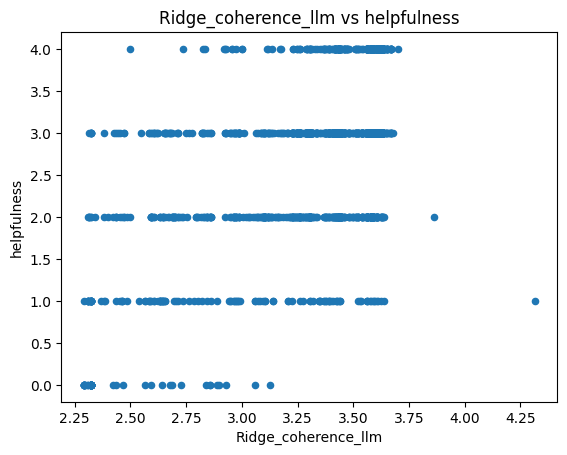

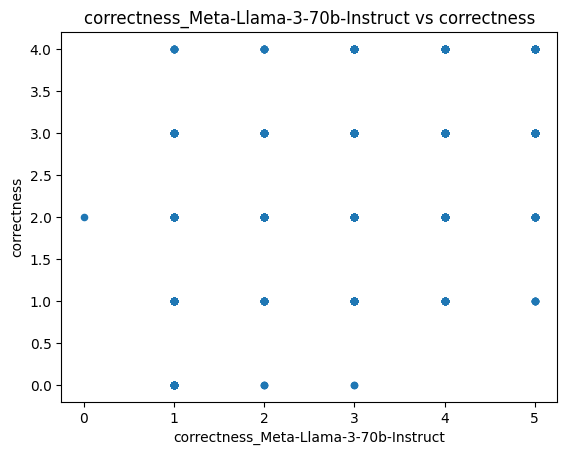

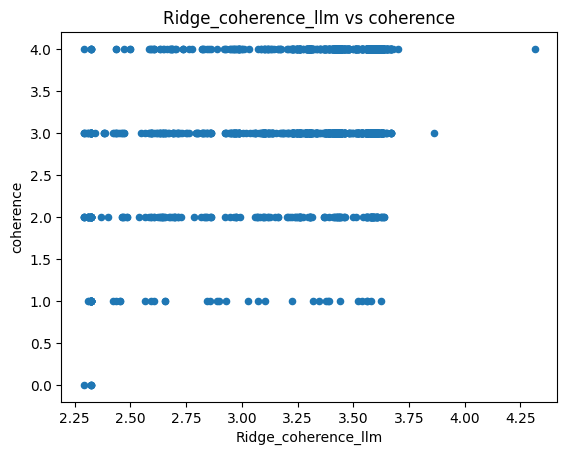

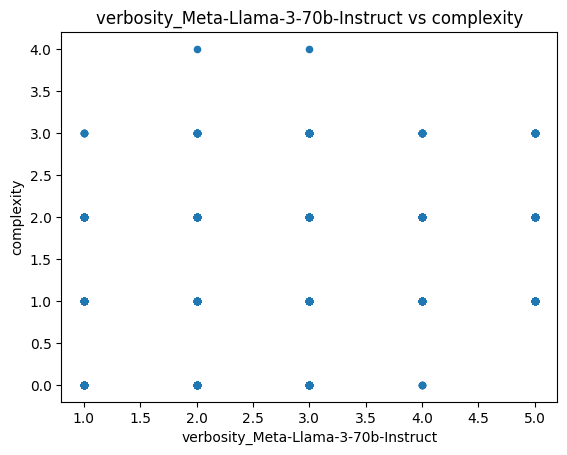

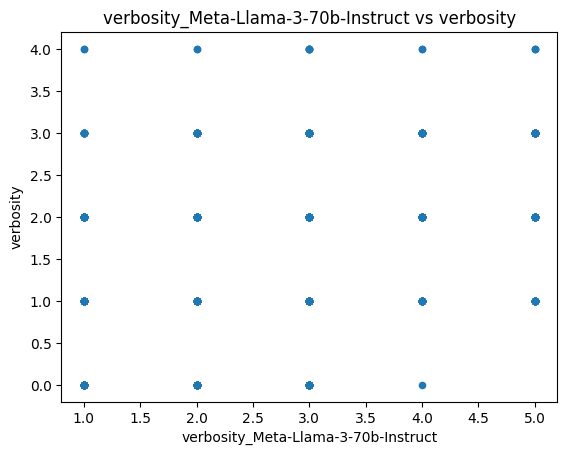

In [14]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
